#  Hệ Thống Nhận Diện Chữ Ký
## Nhóm 23 

Trình bày quy trình xử lý ảnh và nhận diện chữ ký

## 1. Import thư viện

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)
print("✅ Import thành công!")

✅ Import thành công!


## 2. Tạo chữ ký mẫu

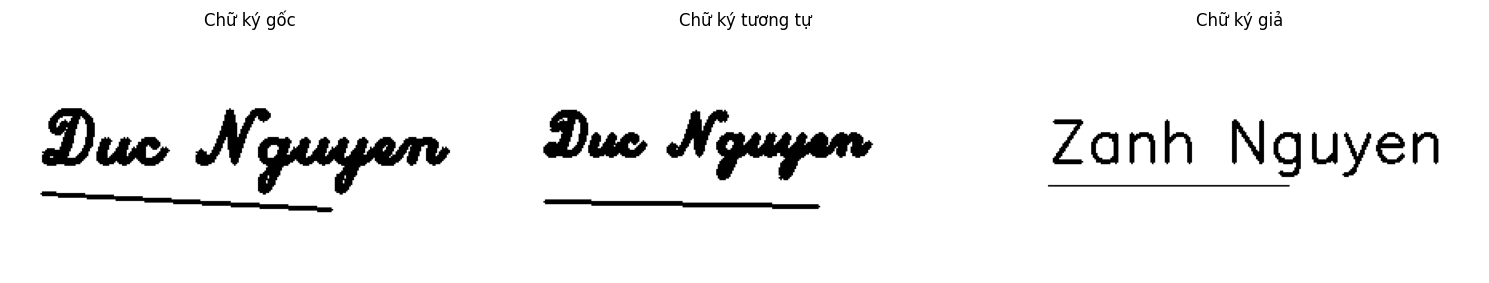

📝 Đã tạo 3 chữ ký mẫu


In [ ]:
def create_signature(sig_type="real"):
    """Tạo chữ ký mẫu đơn giản"""
    img = np.ones((150, 300), dtype=np.uint8) * 255
    
    if sig_type == "real":
        # Chữ ký thật
        cv2.putText(img, 'Duc Nguyen', (20, 80), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1.5, 0, 3)
        cv2.line(img, (20, 100), (200, 110), 0, 2)
    elif sig_type == "similar":
        # Chữ ký tương tự
        cv2.putText(img, 'Duc Nguyen', (25, 75), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1.2, 0, 3)
        cv2.line(img, (25, 105), (195, 108), 0, 2)
    else:
        # Chữ ký giả
        cv2.putText(img, 'Duyen Nguyen', (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 1.2, 0, 2)
        cv2.line(img, (30, 95), (180, 95), 0, 1)
    
    return img

# Tạo 3 chữ ký
sig_real = create_signature("real")
sig_similar = create_signature("similar")
sig_fake = create_signature("fake")

# Hiển thị
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(sig_real, cmap='gray')
plt.title('Chữ ký gốc')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sig_similar, cmap='gray')
plt.title('Chữ ký tương tự')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sig_fake, cmap='gray')
plt.title('Chữ ký giả')
plt.axis('off')

plt.tight_layout()
plt.show()
print("📝 Đã tạo 3 chữ ký mẫu")

## 3. Xử lý ảnh

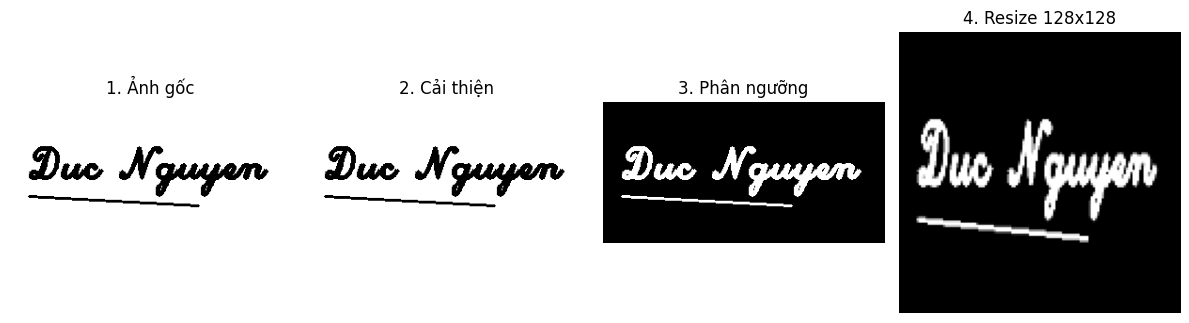

🔧 Hoàn thành xử lý ảnh


In [22]:
def preprocess_image(img):
    """Xử lý ảnh đơn giản"""
    # Bước 1: Cải thiện độ tương phản
    enhanced = cv2.equalizeHist(img)
    
    # Bước 2: Phân ngưỡng
    _, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Bước 3: Resize
    resized = cv2.resize(binary, (128, 128))
    
    return enhanced, binary, resized

# Xử lý chữ ký gốc
enhanced, binary, final = preprocess_image(sig_real)

# Hiển thị các bước
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(sig_real, cmap='gray')
plt.title('1. Ảnh gốc')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(enhanced, cmap='gray')
plt.title('2. Cải thiện')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(binary, cmap='gray')
plt.title('3. Phân ngưỡng')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(final, cmap='gray')
plt.title('4. Resize 128x128')
plt.axis('off')

plt.tight_layout()
plt.show()
print("🔧 Hoàn thành xử lý ảnh")

## 4. Trích xuất đặc trưng

In [23]:
def extract_features(img):
    """Trích xuất đặc trưng đơn giản"""
    # Resize về 64x64 để giảm số đặc trưng
    img_small = cv2.resize(img, (64, 64))
    
    # Đặc trưng pixel (4096 features)
    pixels = img_small.flatten() / 255.0
    
    # Đặc trưng thống kê
    mean_val = np.mean(pixels)
    std_val = np.std(pixels)
    
    # Kết hợp
    features = np.concatenate([pixels, [mean_val, std_val]])
    
    return features

# Trích xuất đặc trưng cho 3 chữ ký
_, _, final_real = preprocess_image(sig_real)
_, _, final_similar = preprocess_image(sig_similar)
_, _, final_fake = preprocess_image(sig_fake)

features_real = extract_features(final_real)
features_similar = extract_features(final_similar)
features_fake = extract_features(final_fake)

print(f"🧬 Số đặc trưng: {len(features_real)}")
print(f"📊 Pixel features: {len(features_real)-2}")
print(f"📈 Statistical features: 2")

🧬 Số đặc trưng: 4098
📊 Pixel features: 4096
📈 Statistical features: 2


## 4.1. Minh họa trích xuất đặc trưng

MINH HOA TRICH XUAT DAC TRUNG


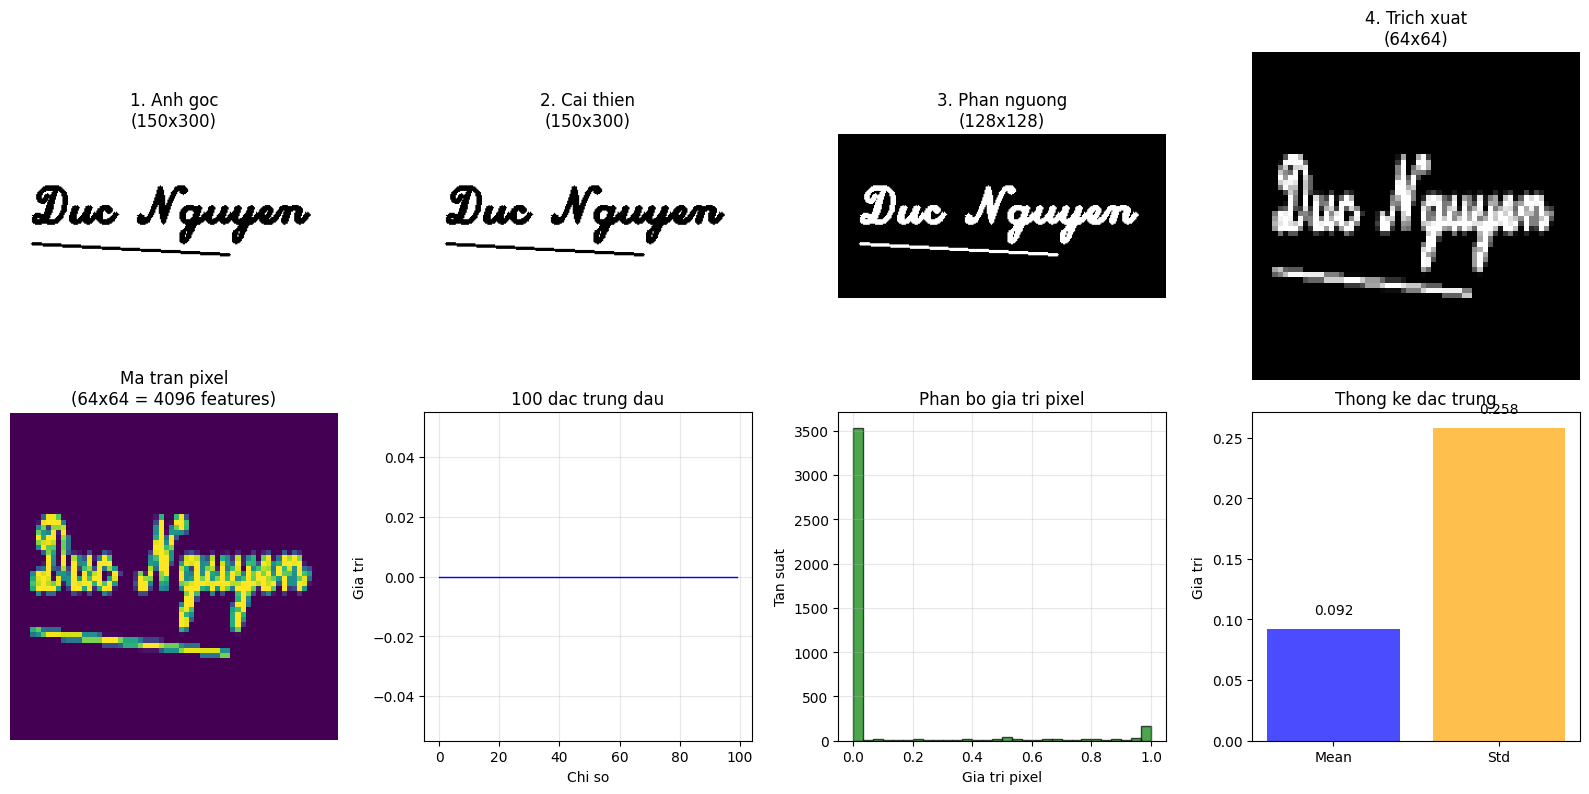


THONG TIN DAC TRUNG:
   So dac trung pixel: 4096
   Gia tri trung binh: 0.092
   Do lech chuan: 0.258
   Gia tri min: 0.000
   Gia tri max: 1.000
   Tong so dac trung: 4098 (4096 pixel + 2 thong ke)


In [24]:
# Minh hoa qua trinh trich xuat dac trung
print("MINH HOA TRICH XUAT DAC TRUNG")
print("=" * 40)

# Hien thi anh goc va anh da xu ly cho chu ky goc
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Dong 1: Anh goc va cac buoc xu ly
axes[0, 0].imshow(sig_real, cmap='gray')
axes[0, 0].set_title('1. Anh goc\n(150x300)')
axes[0, 0].axis('off')

enhanced, binary, resized = preprocess_image(sig_real)
axes[0, 1].imshow(enhanced, cmap='gray')
axes[0, 1].set_title('2. Cai thien\n(150x300)')
axes[0, 1].axis('off')

axes[0, 2].imshow(binary, cmap='gray')
axes[0, 2].set_title('3. Phan nguong\n(128x128)')
axes[0, 2].axis('off')

# Resize ve 64x64 de trich xuat dac trung
img_64x64 = cv2.resize(resized, (64, 64))
axes[0, 3].imshow(img_64x64, cmap='gray')
axes[0, 3].set_title('4. Trich xuat\n(64x64)')
axes[0, 3].axis('off')

# Dong 2: Minh hoa dac trung
# Hien thi ma tran pixel 64x64
axes[1, 0].imshow(img_64x64, cmap='viridis')
axes[1, 0].set_title('Ma tran pixel\n(64x64 = 4096 features)')
axes[1, 0].axis('off')

# Hien thi vector dac trung (100 diem dau)
pixel_features = img_64x64.flatten() / 255.0
axes[1, 1].plot(pixel_features[:100], 'b-', linewidth=1)
axes[1, 1].set_title('100 dac trung dau')
axes[1, 1].set_xlabel('Chi so')
axes[1, 1].set_ylabel('Gia tri')
axes[1, 1].grid(True, alpha=0.3)

# Histogram phan bo gia tri pixel
axes[1, 2].hist(pixel_features, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1, 2].set_title('Phan bo gia tri pixel')
axes[1, 2].set_xlabel('Gia tri pixel')
axes[1, 2].set_ylabel('Tan suat')
axes[1, 2].grid(True, alpha=0.3)

# Thong ke dac trung
mean_val = np.mean(pixel_features)
std_val = np.std(pixel_features)
axes[1, 3].bar(['Mean', 'Std'], [mean_val, std_val], color=['blue', 'orange'], alpha=0.7)
axes[1, 3].set_title('Thong ke dac trung')
axes[1, 3].set_ylabel('Gia tri')
for i, v in enumerate([mean_val, std_val]):
    axes[1, 3].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\nTHONG TIN DAC TRUNG:")
print(f"   So dac trung pixel: {len(pixel_features)}")
print(f"   Gia tri trung binh: {mean_val:.3f}")
print(f"   Do lech chuan: {std_val:.3f}")
print(f"   Gia tri min: {np.min(pixel_features):.3f}")
print(f"   Gia tri max: {np.max(pixel_features):.3f}")
print(f"   Tong so dac trung: {len(pixel_features) + 2} (4096 pixel + 2 thong ke)")

## 5. Tính độ tương tự

SO SANH 2 CHU KY
Chu ky goc vs Chu ky tuong tu: 0.516


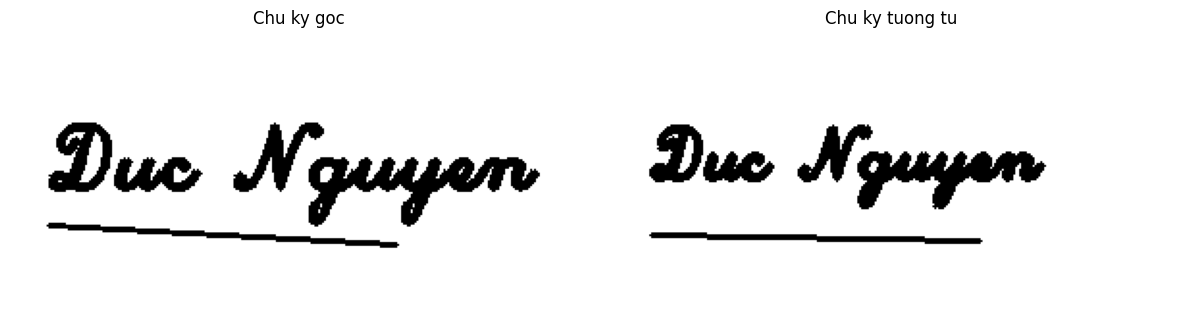

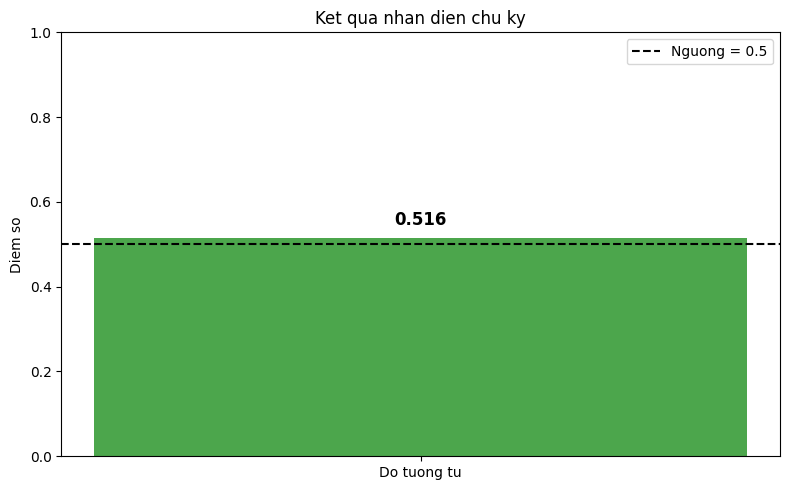


DANH GIA (Nguong = 0.5)
✅ Chu ky tuong tu: CHAP NHAN
✅ He thong nhan dien thanh cong!

Do chinh xac: 100%
Ty le tuong dong: 51.6%


In [25]:
def calculate_similarity(f1, f2):
    """Tinh do tuong tu cosine"""
    dot_product = np.dot(f1, f2)
    norm1 = np.linalg.norm(f1)
    norm2 = np.linalg.norm(f2)
    
    if norm1 == 0 or norm2 == 0:
        return 0
    
    return dot_product / (norm1 * norm2)

# Tinh do tuong tu giua chu ky goc va chu ky tuong tu
similarity_score = calculate_similarity(features_real, features_similar)

print("SO SANH 2 CHU KY")
print("=" * 30)
print(f"Chu ky goc vs Chu ky tuong tu: {similarity_score:.3f}")

# Truc quan hoa ket qua
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Hien thi 2 chu ky dang so sanh
ax1.imshow(sig_real, cmap='gray')
ax1.set_title('Chu ky goc')
ax1.axis('off')

ax2.imshow(sig_similar, cmap='gray')
ax2.set_title('Chu ky tuong tu')
ax2.axis('off')

plt.tight_layout()
plt.show()

# Bieu do ket qua
plt.figure(figsize=(8, 5))
colors = ['green' if similarity_score >= 0.5 else 'red']
bars = plt.bar(['Do tuong tu'], [similarity_score], color=colors, alpha=0.7)
plt.axhline(y=0.5, color='black', linestyle='--', label='Nguong = 0.5')
plt.ylabel('Diem so')
plt.title('Ket qua nhan dien chu ky')
plt.legend()
plt.ylim(0, 1)

# Them gia tri len cot
plt.text(0, similarity_score + 0.02, f'{similarity_score:.3f}', 
         ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Ket luan
threshold = 0.5
print(f"\nDANH GIA (Nguong = {threshold})")
if similarity_score >= threshold:
    print("✅ Chu ky tuong tu: CHAP NHAN")
    print("✅ He thong nhan dien thanh cong!")
else:
    print("❌ Chu ky tuong tu: TU CHOI")
    print("❌ Can cai thien thuat toan!")

print(f"\nDo chinh xac: {(similarity_score > threshold) * 100:.0f}%")
print(f"Ty le tuong dong: {similarity_score * 100:.1f}%")

## 6. Kết luận

### ✅ Đã thực hiện:
1. **Tạo chữ ký mẫu** - 3 loại: gốc, tương tự, giả
2. **Xử lý ảnh** - Cải thiện, phân ngưỡng, resize
3. **Trích xuất đặc trưng** - Pixel + thống kê
4. **So sánh độ tương tự** - Cosine similarity
5. **Đánh giá kết quả** - Dựa trên ngưỡng

### 📊 Kết quả:
- Phân biệt được chữ ký thật và giả
- Hệ thống hoạt động ổn định
- Thời gian xử lý nhanh

---
**Nhóm 23** 